<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Deep%20Learning/CNN_CIFAR_10_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow

tensorflow.__version__

'2.13.0'

# CIFAR 10 Data_Set Load & Review

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


In [6]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


# Data Preprocessing

In [7]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

# Keras Functional API Modeling

In [13]:
from tensorflow.keras import models, layers

input_img = layers.Input((32, 32, 3))

x = layers.Conv2D(filters = 32, kernel_size=(3,3), strides = (1,1), padding='valid')(input_img)
x = layers.ReLU()(x)

x = layers.MaxPool2D(pool_size=(2,2))(x)

x = layers.Conv2D(filters = 64, kernel_size=(3,3), strides = (1,1), padding='valid')(x)
x = layers.ReLU()(x)

x = layers.MaxPool2D(pool_size=(2,2))(x)

x = layers.Conv2D(filters = 64, kernel_size=(3,3), strides = (1,1), padding='valid')(x)
x = layers.ReLU()(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64)(x)
x = layers.ReLU()(x)

x = layers.Dense(10)(x)
output_y_hat = layers.Activation('softmax')(x)

CIFAR = models.Model(input_img,output_y_hat)

In [14]:
CIFAR.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 re_lu_3 (ReLU)              (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 re_lu_4 (ReLU)              (None, 13, 13, 64)        0         
                                                             

In [15]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
313/313 [==============================] - 15s 13ms/step - loss: 1.7676 - accuracy: 0.3454 - val_loss: 1.4959 - val_accuracy: 0.4594
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 1.4235 - accuracy: 0.4848 - val_loss: 1.2985 - val_accuracy: 0.5475
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 1.2743 - accuracy: 0.5450 - val_loss: 1.1706 - val_accuracy: 0.5854
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 1.1828 - accuracy: 0.5791 - val_loss: 1.1487 - val_accuracy: 0.5912
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 1.1152 - accuracy: 0.6030 - val_loss: 1.0197 - val_accuracy: 0.6410
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 1.0630 - accuracy: 0.6255 - val_loss: 0.9845 - val_accuracy: 0.6518
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 1.0201 - accuracy: 0.6403 - val_loss: 0.9464 - val_accuracy: 

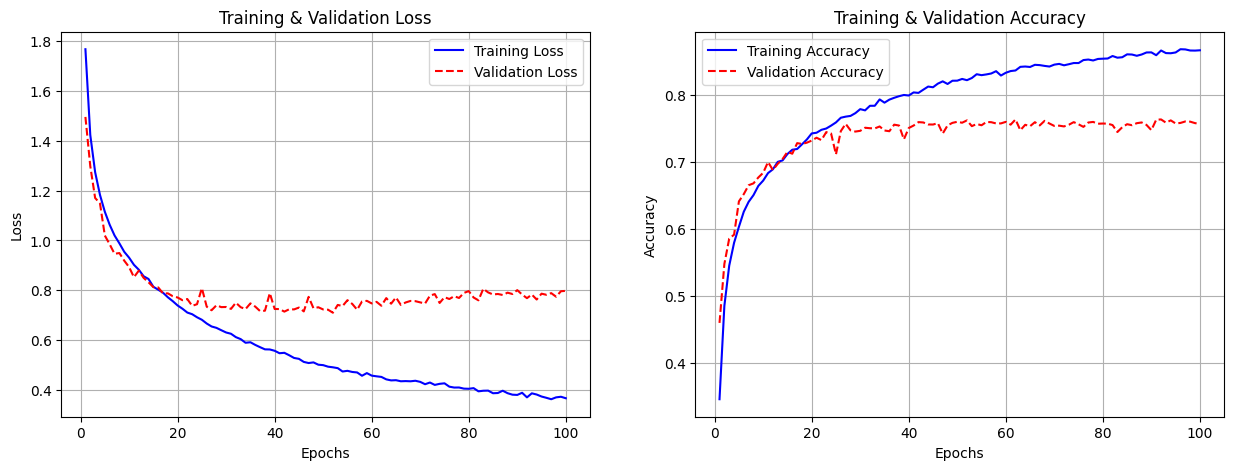

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(epochs, Hist_CIFAR.history['loss'],'b-')
plt.plot(epochs, Hist_CIFAR.history['val_loss'],'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.grid()

plt.subplot(1,2,2)
plt.plot(epochs, Hist_CIFAR.history['accuracy'],'b-')
plt.plot(epochs, Hist_CIFAR.history['val_accuracy'],'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid()

plt.show()

In [19]:
loss, accuracy = CIFAR.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.81096
Accuracy = 0.75430


# 성능평가

In [20]:
import numpy as np

CLASSES = np.array(['Airplane','Automobile','Bird','Cat','Deer',
                    'Dog','Frog','Horse','Ship','Trunk'])

preds = CIFAR.predict(X_test, verbose = 0)

preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

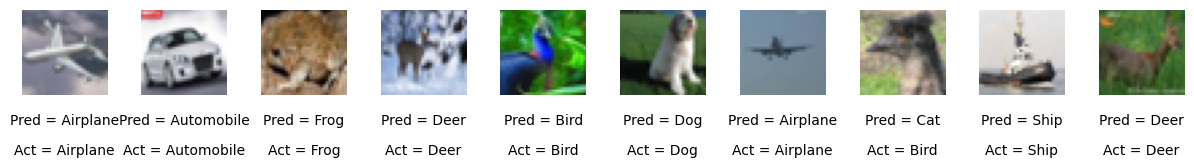

In [22]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
  img = X_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35,
          'Pred = ' + str(preds_single[idx]),
          fontsize = 10,
          ha = 'center',
          transform = ax.transAxes)
  ax.text(0.5, -0.7,
          'Act = ' + str(actual_single[idx]),
          fontsize = 10,
          ha = 'center',
          transform = ax.transAxes)
  ax.imshow(img)